# ICTP-SAIFR Second School of Quantum Computing Hackaton:
## Bose Einstein Condensates and the Involvement in Advances for New Technologies

Gabriel Nogueira Audi Monteiro

Gustavo Mariano Kanaiama Pereira

Leandro Morais

Octávio da Motta

Tiago Pernambuco Toledo de Macêdo


The first thing we'll be doing on this challenge is importing the Python libraries we'll use and setting the parameters for our system, such as the space and time steps ($\Delta x$ and $\Delta t$, respectively) so as to respect the stable evolution condition, $-\frac{2}{\Delta t} < V <\frac{2}{\Delta t} - \frac{2}{(\Delta x)^2}$. In the code, we'll call $\Delta x$ and $\Delta t$ `dx` and `dt`. We also need to define the limits of our spatial domain and time evolution, which we will call `x0`, `xf` for spatial start and endpoints and `t0`, `tf` for the lower and upper limits of integration in time. Throughout our work, we will also take $\hbar = 1$ to simplify numerical calculations.

In [1]:
# Importing the libraries we'll be using for this challenge

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting a spacing along the x spatial axis
dx = 0.05

# Setting a time spacing
dt = 0.0001

# Setting the limits of our spatial domain: from x0 to xf
x0 = -4
xf = 4

# Creating a spatial array, effectively the x axis
xr = np.arange(x0, xf, dx)

# Creating a variable for the number of points we'll be considering in discretized space
Lx = len(xr)

# Setting the limits of our time evolution: from t0 to tf
t0 = 0
tf = 3

# Creating an array to store the different times we'll be considering
tr = np.arange(t0, tf, dt)

# Storing the number of time points in our evolution
Lt = len(tr)

Now we should create functions to compute any quantities we might like to compute during our code. This makes it much easier to do repetitive tasks later on. The functions we'll be defining here compute the action of the kinetic energy operator ($\hat{K} = -\frac{1}{2}\frac{\partial^2}{\partial x^2}$), where we approximate the second derivative numerically as
$$\frac{\partial f}{\partial x^2} \approx \frac{f(x_{i+1}, t) - 2f(x_i, t) + f(x_{i-1}, t)}{(\Delta x)^2}$$ the harmonic potential $V(x) = \frac{1}{2}x^2$, the Hamiltonian $\hat{H} = \hat{K} + V$, a function to compute the steps on the real and imaginary parts of the wave function according to Visscher's algorithm: $$R(x, t + \frac{\Delta t}{2}) = R(x, t - \frac{\Delta t}{2}) + \Delta t\hat{H} I(x, t)$$ $$I(x, t + \frac{\Delta t}{2}) = I(x, t - \frac{\Delta t}{2} - \Delta t\hat{H} R(x, t)$$ and a function to calculate the probability distribution function: $$|\psi(x, t)|^2 \approx R(x, t)^2 + I(x, t - \frac{\Delta t}{2})I(x, t +\frac{\Delta t}{2})$$


In [3]:
# Kinetic Energy Operator: K = -1/2*d^2/dx^2. Here f can be either R or I
def K(f, i, dx):

# Excluding the kinetic energy terms from the edges of the spatial domain since our approximation for the second derivative isn't computable there
  if i == 0 or i == len(f)-1:
    return 0

  return -1/2*(f[i+1] - 2*f[i] + f[i-1])/dx**2

# Function to calculate the potential energy at each point in space
def V(x):
  return 1/2*x**2

# Function to calculate the Hamiltonian operator applied to either R or I
def H(f, i, dx):

  # Here i is the index of the array we are applying H to (R or I) and we calculate x on that point as below:
  x = x0 + i*dx

  return K(f, i, dx) + V(x)*f[i]

# This function uses the functions above to compute a time-evolution step based on Visscher's algorithm
def step(R, I, dx, dt):

  for i in range(Lx):

    # Computing the step for R
    R[i] = R[i] + dt*H(I, i, dx)
    # Computing the step for I
    I[i] = I[i] - dt*H(R, i, dx)

  # Return the new values of R and I
  return R, I

# This function calculates the probability distribution function for our wavefunction: P(x) = |psi(x)|^2
def Prob(R, I1, I2):
  return R**2 + I1*I2

## a)

Now that we have our functions ready, we can start actually studying the behavior of the Gross-Pitaevskii Equation. First, we'll study the case where there are no interactions ($U_0$ = 0 in the GPE), in which the GPE reduces to the Schrödinger Equation and we'll be taking the harmonic potential described earlier. We'll start up our system on a Gaussian wave function, $\psi(x, 0) = (\frac{1}{\pi})^{1/4} e^{-\frac{1}{2}x^2}$ and see how it evolves in time.

In [4]:
# Initializing R
R = np.zeros(Lx)

# Setting R equal to our ansatz, since the ansatz is a real function
for i in range(Lx):
  R[i] = (1/np.pi)**(1/4)*np.exp(-1/2*xr[i]**2)

# Initializing I
I = np.zeros(Lx)

# Taking the half-step in I needed for Visscher's algorithm
for i in range(Lx):
  I[i] = I[i]- dt/2*H(R, i, dx)

Let's see how a plot of $|\psi(x, 0)|^2$ looks in this state:

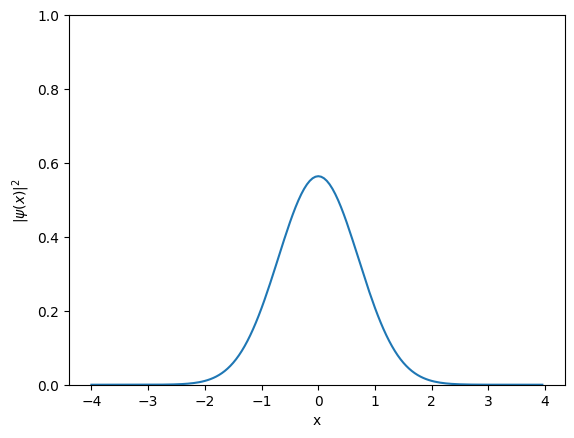

In [5]:
# Plotting the probability distribution for our initial state
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(xr, R**2)

Now that we know how our initial state statistics look, let's see what happens when we evolve it according to our Gross-Pitaevskii (effectively Schrödinger) equation:

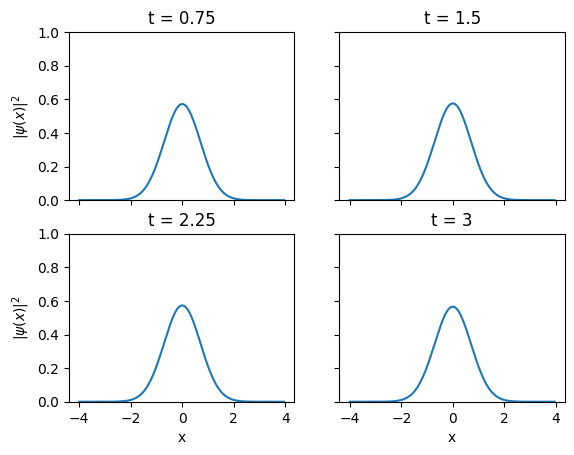

In [6]:
# Plot configurations for displaying different frames of our time-evolution
fig, axs = plt.subplots(2, 2)

for ax in axs.flat:
  ax.set(ylim = (0, 1))
  ax.label_outer()

axs[1, 0].set(xlabel = 'x')
axs[1, 1].set(xlabel = 'x')

axs[0, 0].set(ylabel = r'$|\psi(x)|^2$')
axs[1, 0].set(ylabel=r'$|\psi(x)|^2$')

axs[0, 0].set_title('t = ' + str(tf/4))
axs[0, 1].set_title('t = ' + str(tf/2))
axs[1, 0].set_title('t = ' + str(3*tf/4))
axs[1, 1].set_title('t = ' + str(tf))

# Computing the time evolution until a quarter of the final time
for j in range(int((tf/4-t0)/dt)):
    R, I = step(R, I, dx, dt)

R2, I2 = step(R, I, dx, dt)

# Plotting the probability distribution function
axs[0, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until half the final time
for j in range(int((tf/2-tf/4)/dt)):
    R, I = step(R, I, dx, dt)

R2, I2 = step(R, I, dx, dt)

# Plotting the probability distribution function
axs[0, 1].plot(xr, Prob(R, I, I2))

# Computing the time evolution until three quarters of the final time
for j in range(int((3*tf/4-tf/2)/dt)):
    R, I = step(R, I, dx, dt)

R2, I2 = step(R, I, dx, dt)

# Plotting the probability distribution function
axs[1, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until the final time
for j in range(int((tf-3*tf/4)/dt)):
    R, I = step(R, I, dx, dt)

R2, I2 = step(R, I, dx, dt)

# Plotting the probability distribution function
axs[1, 1].plot(xr, Prob(R, I, I2))

It seems that nothing happens! This is in fact the case, and is due to the fact that our initial state, $\psi(x, 0) = (\frac{1}{\pi})^{1/4} e^{-\frac{1}{2}x^2}$, is an eigenstate (the ground state, actually!) of the harmonic oscillator Hamiltonian it is evolving according to. This means that the action of the time evolution operator is effectively $U(t)\psi(x, 0) = e^{-i E_0 t}\psi(x, 0) = \psi(x, t)$, where $E_0$ is the energy eigenvalue associated to this stat. This means that, for any $t$, $|\psi(x, t)|^2 = |e^{-i E_0 t}\psi(x, 0)|^2 = |\psi(x, 0)^2|$, showing that time evolution leaves this state unchanged up to a global phase, which means the probability distribution doesn't change.

We can also compute the integral $\int^{\infty}_{-∞} |\psi(x, t)|^2dx$ to check the normalization condition as a way to assess if the time evolution was stable. It may not be foolproof, but an unstable time evolution will often shift the value of the integral away from $1$, so a value close to one usually indicates that our functions work well. For that, we'll use numpy's `np.trapz` function to compute the integral through the trapezoidal method:

In [7]:
# Checking the normalization of the wavefunction as a way to assess time-evolution stability
np.trapz(Prob(R, I, I2), xr, dx)

1.0036091756642906

The value looks good! Let's go on to the next problem.

## b)

For a second investigation, let's try the state $\psi(x, 0) = (\frac{2}{\pi})^{\frac{1}{4}} e^{-x^2}$. This is not an eigenstate of the quantum harmonic oscillator Hamiltonian, so we expect the probability distribution to change with time.

In [8]:
# Initializing R
R = np.zeros(Lx)

# Setting R equal to our ansatz, since the ansatz is a real function
for i in range(Lx):
  R[i] = (2/np.pi)**(1/4)*np.exp(-xr[i]**2)

# Initializing I
I = np.zeros(Lx)

# Taking the half-step in I needed for Visscher's algorithm
for i in range(Lx):
  I[i] = I[i]- dt/2*H(R, i, dx)

Let's see how this second initial state looks:

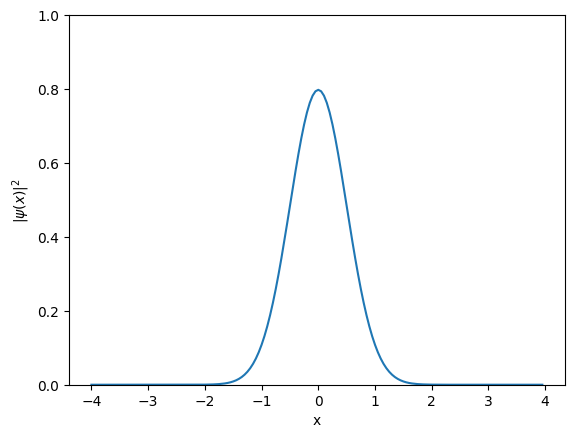

In [9]:
# Plotting the probability distribution for our initial state
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(xr, R**2)

Clearly it is more sharply peaked than the last one. Let's see what happens when we let this state evolve in time by the action of the same Hamiltonian as before:

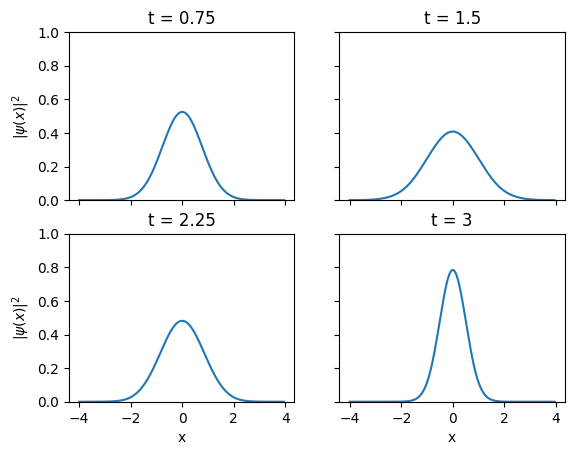

In [10]:
# Plot configurations for displaying different frames of our time-evolution
fig, axs = plt.subplots(2, 2)

for ax in axs.flat:
  ax.set(ylim = (0, 1))
  ax.label_outer()

axs[1, 0].set(xlabel = 'x')
axs[1, 1].set(xlabel = 'x')

axs[0, 0].set(ylabel = r'$|\psi(x)|^2$')
axs[1, 0].set(ylabel=r'$|\psi(x)|^2$')

axs[0, 0].set_title('t = ' + str(tf/4))
axs[0, 1].set_title('t = ' + str(tf/2))
axs[1, 0].set_title('t = ' + str(3*tf/4))
axs[1, 1].set_title('t = ' + str(tf))

# Computing the time evolution until a quarter of the final time
for j in range(int((tf/4-t0)/dt)):
    R, I = step(R, I, dx, dt)

R2, I2 = step(R, I, dx, dt)

# Plotting the probability distribution function
axs[0, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until half the final time
for j in range(int((tf/2-tf/4)/dt)):
    R, I = step(R, I, dx, dt)

R2, I2 = step(R, I, dx, dt)

# Plotting the probability distribution function
axs[0, 1].plot(xr, Prob(R, I, I2))

# Computing the time evolution until three quarters of the final time
for j in range(int((3*tf/4-tf/2)/dt)):
    R, I = step(R, I, dx, dt)

R2, I2 = step(R, I, dx, dt)

# Plotting the probability distribution function
axs[1, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until the final time
for j in range(int((tf-3*tf/4)/dt)):
    R, I = step(R, I, dx, dt)

R2, I2 = step(R, I, dx, dt)

# Plotting the probability distribution function
axs[1, 1].plot(xr, Prob(R, I, I2))

Our probability distribution is oscillating! It appears that, as time goes on, the probability to find our particles in each region of our spatial domain gets wider and narrower periodically, which makes sense given the periodic nature of harmonic oscillators.

In [11]:
# Checking the normalization of the wavefunction as a way to assess time-evolution stability
np.trapz(Prob(R, I, I2), xr, dx)

1.0042091714351928

The normalization also looks good. Let's move on to working on an interacting Bose-Einstein Condensate.

## c)

For the interacting Bose-Einstein Condensate (BEC), we will have to make a few changes to the functions we were using before. First, we want to add an interaction term $U_0|\psi(x, t)|^2$ to the Hamiltonian. Let's also work without any external potentials ($V(x) = 0$). For that, we'll create new functions `V0`, `HInteracting` and `StepInteracting`. Our Hamiltonian will now read $$\hat{H} = \hat{K} + V + U_0|\psi|^2 = -\frac{1}{2}\frac{\partial^2}{\partial x^2} + U_0|\psi|^2$$ since $V = 0$. For our new time steps for the real and imaginary parts of the wave function, we have

$$R(x, t + \frac{\Delta t}{2}) = \frac{R(x, t - \frac{\Delta t}{2}) + \Delta t\hat{H} I(x, t)}{1 - \Delta tU_0R(t - \frac{\Delta t}{2})I(\Delta t)}$$

$$I(x, t + \frac{\Delta t}{2}) = \frac{I(x, t - \frac{\Delta t}{2}) + \Delta t\hat{H} R(x, t)}{1 + \Delta tU_0I(t - \frac{\Delta t}{2})R(\Delta t)}$$

Note that both of these updates reduce to the ones we used on the non-interacting case when $U_0 = 0$.

In [12]:
# Creating a function to employ the potential we'll be using for the interacting case (V(x) = 0)
def V0(x):
  return 0

# Creating a function to apply the Hamiltonian on R and I for the interacting case
def HInteracting(f, i, dx, V_ext, U0):

  x = x0 + i*dx

  return K(f, i, dx) + V_ext(x)*f[i] + U0*f[i]**3

# This function takes steps in R and I based on the interacting-case formulae and returns their new values
def StepInteracting(R, I, dx, dt, V_ext, U0):

  for i in range(Lx):

    R[i] = (R[i] + dt*HInteracting(I, i, dx, V_ext, U0))/(1 - dt*U0*R[i]*I[i])
    I[i] = (I[i] - dt*HInteracting(R, i, dx, V_ext, U0))/(1 + dt*U0*R[i]*I[i])

  return R, I

Now, let's choose a value for the coupling constat $U_0$, create a new initial state and see what happens!

In [13]:
# Setting a value for the interaction coupling constant
U0 = -2

The initial state we'll use here is $\psi(x, 0) = \frac{1}{\sqrt{2} cosh(x)}$.

In [14]:
# Initializing R
R = np.zeros(Lx)

# Setting R equal to our ansatz, since the ansatz is a real function
for i in range(Lx):
  R[i] = 1/np.sqrt(2)*1/np.cosh(xr[i])

# Initializing I
I = np.zeros(Lx)

# Taking the half-step in I needed for Visscher's algorithm
for i in range(Lx):
    I[i] = I[i] - dt/2*(K(R, i, dx) + V0(x0 + i*dx)*R[i] + U0*(R[i]**2 + I[i]**2)*R[i])

Let's see how this initial state looks:

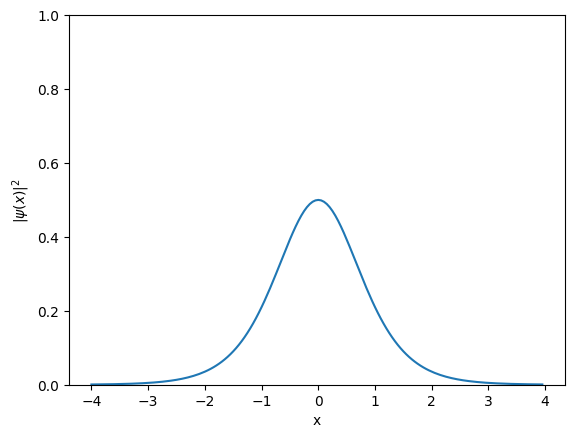

In [15]:
# Plotting the probability distribution for our initial state
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(xr, R**2)

Now, we'll evolve it in time and see what happens!

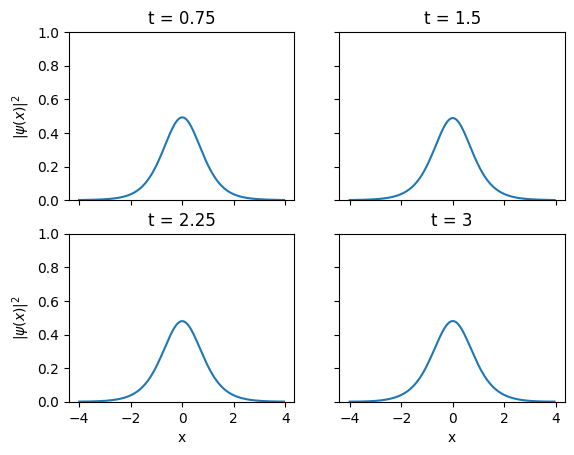

In [16]:
# Plot configurations for displaying different frames of our time-evolution
fig, axs = plt.subplots(2, 2)

for ax in axs.flat:
  ax.set(ylim = (0, 1))
  ax.label_outer()

axs[1, 0].set(xlabel = 'x')
axs[1, 1].set(xlabel = 'x')

axs[0, 0].set(ylabel = r'$|\psi(x)|^2$')
axs[1, 0].set(ylabel=r'$|\psi(x)|^2$')

axs[0, 0].set_title('t = ' + str(tf/4))
axs[0, 1].set_title('t = ' + str(tf/2))
axs[1, 0].set_title('t = ' + str(3*tf/4))
axs[1, 1].set_title('t = ' + str(tf))

# Computing the time evolution until a quarter of the final time
for j in range(int((tf/4-t0)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[0, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until half the final time
for j in range(int((tf/2-tf/4)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[0, 1].plot(xr, Prob(R, I, I2))

# Computing the time evolution until three quarters of the final time
for j in range(int((3*tf/4-tf/2)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[1, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until the final time
for j in range(int((tf-3*tf/4)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[1, 1].plot(xr, Prob(R, I, I2))

In [17]:
# Checking the normalization of the wavefunction as a way to assess time-evolution stability
np.trapz(Prob(R, I, I2), xr, dx)

1.0020140189734181

It seems like not much is happening, although looking at the positions of the left and right tails of the distribution one can see some slight changes. Let's increase the strength of our inter-boson interactions and see how it changes the dynamics of the system.

In [18]:
# Setting a new value for the interaction coupling constant
U0 = -3

In [19]:
# Initializing R
R = np.zeros(Lx)

# Setting R equal to our ansatz, since the ansatz is a real function
for i in range(Lx):
  R[i] = 1/np.sqrt(2)*1/np.cosh(xr[i])

# Initializing I
I = np.zeros(Lx)

# Taking the half-step in I needed for Visscher's algorithm
for i in range(Lx):
    I[i] = I[i] - dt/2*(K(R, i, dx) + V0(x0 + i*dx)*R[i] + U0*(R[i]**2 + I[i]**2)*R[i])

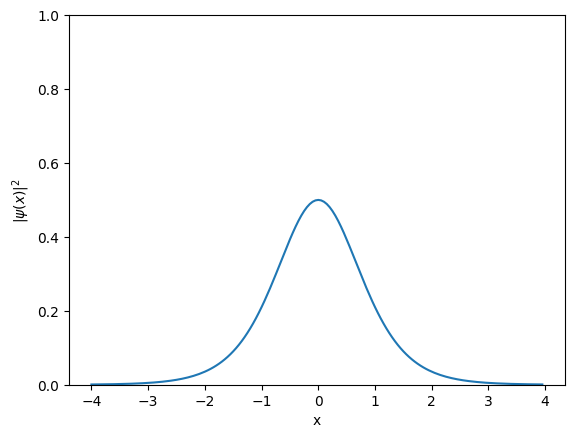

In [20]:
# Plotting the probability distribution for our initial state
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(xr, R**2)

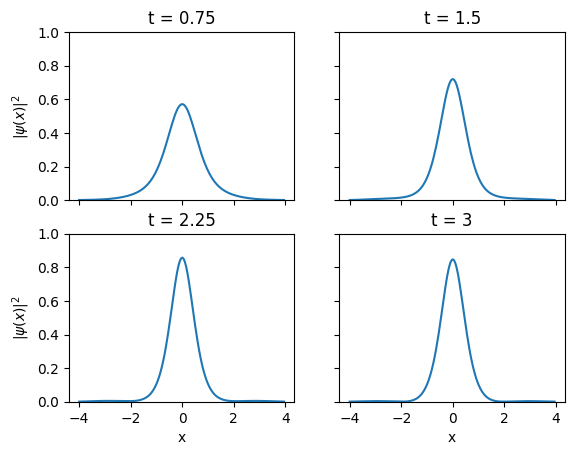

In [21]:
# Plot configurations for displaying different frames of our time-evolution
fig, axs = plt.subplots(2, 2)

for ax in axs.flat:
  ax.set(ylim = (0, 1))
  ax.label_outer()

axs[1, 0].set(xlabel = 'x')
axs[1, 1].set(xlabel = 'x')

axs[0, 0].set(ylabel = r'$|\psi(x)|^2$')
axs[1, 0].set(ylabel=r'$|\psi(x)|^2$')

axs[0, 0].set_title('t = ' + str(tf/4))
axs[0, 1].set_title('t = ' + str(tf/2))
axs[1, 0].set_title('t = ' + str(3*tf/4))
axs[1, 1].set_title('t = ' + str(tf))

# Computing the time evolution until a quarter of the final time
for j in range(int((tf/4-t0)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[0, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until half the final time
for j in range(int((tf/2-tf/4)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[0, 1].plot(xr, Prob(R, I, I2))

# Computing the time evolution until three quarters of the final time
for j in range(int((3*tf/4-tf/2)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[1, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until the final time
for j in range(int((tf-3*tf/4)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[1, 1].plot(xr, Prob(R, I, I2))

There is a very clear behavior now! The interactions are attractive (due to the $-$ sign) and the attraction between the particles causes the BEC to be focused on smaller and smaller regions of space, so that the distribution tends to get more and more sharply peaked!

In [22]:
# Checking the normalization of the wavefunction as a way to assess time-evolution stability
np.trapz(Prob(R, I, I2), xr, dx)

0.9993155799302218

Now, since a negative coupling constant causes the probability distribution to get sharply peaked, let's see what happens when we have a positive $U_0$ (and thus, repulsive interactions).

In [23]:
# Setting a new value with opposite sign for the interaction coupling constant
U0 = 2

In [24]:
# Initializing R
R = np.zeros(Lx)

# Setting R equal to our ansatz, since the ansatz is a real function
for i in range(Lx):
  R[i] = 1/np.sqrt(2)*1/np.cosh(xr[i])

# Initializing I
I = np.zeros(Lx)

# Taking the half-step in I needed for Visscher's algorithm
for i in range(Lx):
    I[i] = I[i] - dt/2*(K(R, i, dx) + V0(x0 + i*dx)*R[i] + U0*(R[i]**2 + I[i]**2)*R[i])

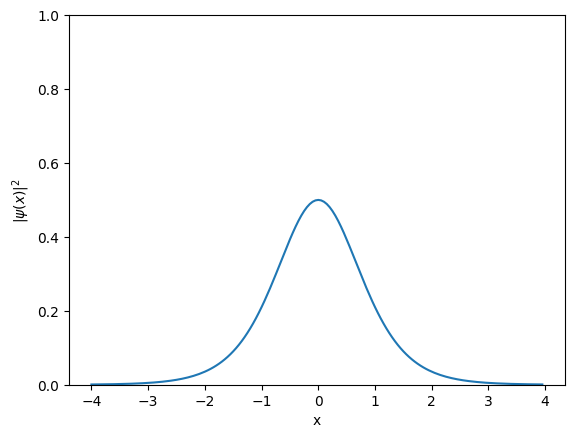

In [25]:
# Plotting the probability distribution for our initial state
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(xr, R**2)

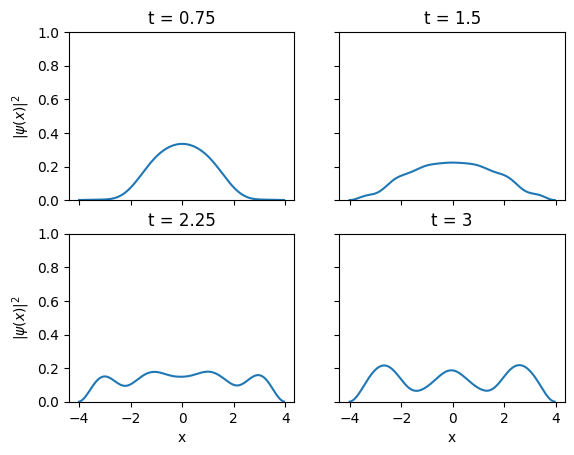

In [26]:
# Plot configurations for displaying different frames of our time-evolution
fig, axs = plt.subplots(2, 2)

for ax in axs.flat:
  ax.set(ylim = (0, 1))
  ax.label_outer()

axs[1, 0].set(xlabel = 'x')
axs[1, 1].set(xlabel = 'x')

axs[0, 0].set(ylabel = r'$|\psi(x)|^2$')
axs[1, 0].set(ylabel=r'$|\psi(x)|^2$')

axs[0, 0].set_title('t = ' + str(tf/4))
axs[0, 1].set_title('t = ' + str(tf/2))
axs[1, 0].set_title('t = ' + str(3*tf/4))
axs[1, 1].set_title('t = ' + str(tf))

# Computing the time evolution until a quarter of the final time
for j in range(int((tf/4-t0)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[0, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until half the final time
for j in range(int((tf/2-tf/4)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[0, 1].plot(xr, Prob(R, I, I2))

# Computing the time evolution until three quarters of the final time
for j in range(int((3*tf/4-tf/2)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[1, 0].plot(xr, Prob(R, I, I2))

# Computing the time evolution until the final time
for j in range(int((tf-3*tf/4)/dt)):
    R, I = StepInteracting(R, I, dx, dt, V0, U0)

R2, I2 = StepInteracting(R, I, dx, dt, V0, U0)

# Plotting the probability distribution function
axs[1, 1].plot(xr, Prob(R, I, I2))

In [27]:
# Checking the normalization of the wavefunction as a way to assess time-evolution stability
np.trapz(Prob(R, I, I2), xr, dx)

1.0142027395724076

Clearly, the repulsive interactions between the particles in the BEC cause the wavefunction (and consequently, the probability distribution) to spread in space, as the particles tend to group less and less, although there is still some kind of oscillatory behavior present, which is typical of the solutions of the Gross-Pitaevskii equation.